<a href="https://colab.research.google.com/github/HRJ369/DH_307/blob/main/DH_307_ppg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PPG Signal Values: [33665.04661017 33872.02881356 34164.23898305 34371.22118644
 34541.67711864 34639.08050847 34651.2559322  34639.08050847
 34639.08050847 34797.36101695]


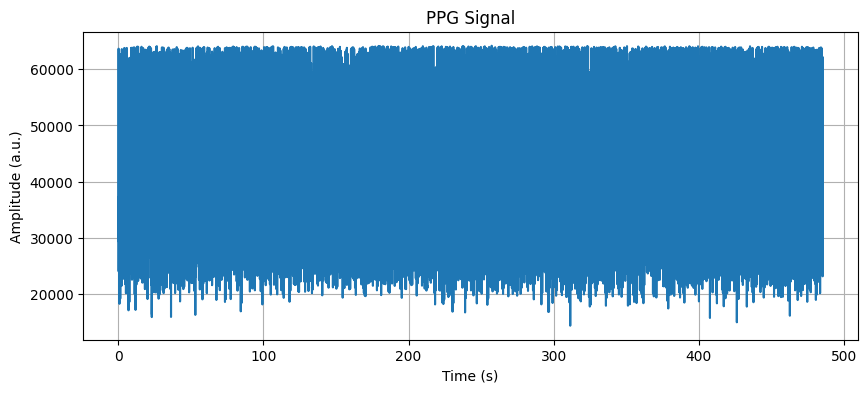

In [39]:
import wfdb
import requests
import matplotlib.pyplot as plt

# URLs for the .hea and .dat files from GitHub
hea_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.hea'
dat_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.dat'

# Download the .hea and .dat files
hea_content = requests.get(hea_url).text
dat_content = requests.get(dat_url).content

# Save the downloaded content to local files
with open('s10_run.hea', 'w') as f:
    f.write(hea_content)

with open('s10_run.dat', 'wb') as f:
    f.write(dat_content)

# Load the dataset using wfdb (make sure the file name matches what was saved)
record = wfdb.rdrecord('s10_run')

# Extract the PPG signal and time
ppg_signal = record.p_signal[:, 0]
time = [i / record.fs for i in range(len(ppg_signal))]

# Print the first few values of the signal
print("PPG Signal Values:", ppg_signal[:10])  # Check the first 10 values

# Plot the PPG signal
plt.figure(figsize=(10, 4))
plt.plot(time, ppg_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.title('PPG Signal')
plt.grid()
plt.show()


In [40]:
pip install wfdb

In [51]:
import wfdb
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# URLs for the .hea and .dat files from GitHub
hea_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.hea'
dat_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.dat'

# Download the .hea and .dat files
hea_content = requests.get(hea_url).text
dat_content = requests.get(dat_url).content

# Save the downloaded content to local files
with open('s10_run.hea', 'w') as f:
    f.write(hea_content)

with open('s10_run.dat', 'wb') as f:
    f.write(dat_content)

# Load the dataset using wfdb
record = wfdb.rdrecord('s10_run')

# Extract the PPG signal and time
ppg_signal = record.p_signal[:, 0]
time = np.arange(len(ppg_signal)) / record.fs  # Adjusted to ensure correct time array

# Print the first few values of the signal
print("PPG Signal Values:", ppg_signal[:10])  # Check the first 10 values

import numpy as np
from scipy.signal import butter, filtfilt

# Low-pass filter function
def lowpass_filter(data, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Define filter parameters
low_cutoff_frequency = 3  # Cut-off frequency for low-pass filter in Hz

fs = record.fs  # Sampling frequency from the .hea file

# Apply the low-pass and high-pass filters
filtered_ppg_signal_lowpass = lowpass_filter(ppg_signal, low_cutoff_frequency, fs)



PPG Signal Values: [33665.04661017 33872.02881356 34164.23898305 34371.22118644
 34541.67711864 34639.08050847 34651.2559322  34639.08050847
 34639.08050847 34797.36101695]


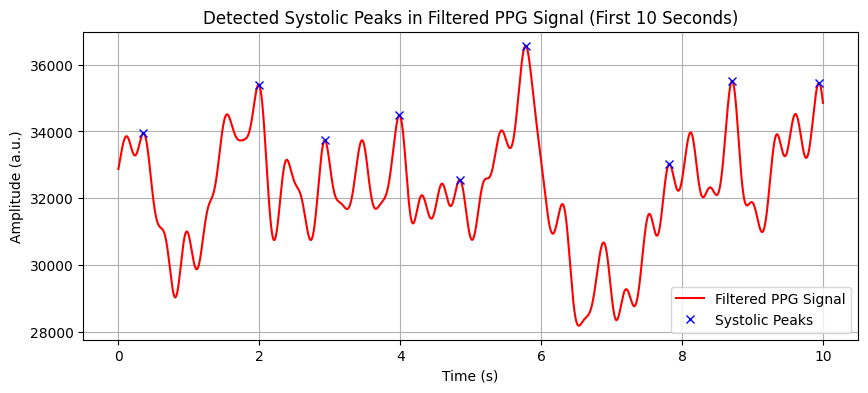

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Define time limit (10 seconds)
time_limit = 10  # seconds

# Find the corresponding index for the time limit
max_index = int(fs * time_limit)

# Slice the time and signal arrays to 10 seconds
time_10s = time[:max_index]
ppg_signal_10s = ppg_signal[:max_index]
filtered_ppg_signal_10s = filtered_ppg_signal_lowpass[:max_index]

# Parameters for systolic peak detection (these values need tuning)
min_distance = int(0.6 * fs)  # Minimum distance between peaks (based on typical heart rate, 60-100 bpm)
prominence_value = 500  # Controls how prominent a peak needs to be
height_threshold = 32000  # Minimum height to be considered a systolic peak

# Detect systolic peaks based on prominence, distance, and height threshold
peaks, properties = find_peaks(filtered_ppg_signal_10s,
                               distance=min_distance,
                               prominence=prominence_value,
                               height=height_threshold)

# Plot the filtered signal with detected systolic peaks (limited to 10 seconds)
plt.figure(figsize=(10, 4))
plt.plot(time_10s, filtered_ppg_signal_10s, label='Filtered PPG Signal', color='red')
plt.plot(time_10s[peaks], filtered_ppg_signal_10s[peaks], "x", label='Systolic Peaks', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Detected Systolic Peaks in Filtered PPG Signal (First 10 Seconds)')
plt.legend()
plt.grid()
plt.show()


Interbeat Intervals (IBI) in seconds: [1.634 0.94  1.058 0.856 0.934 2.04  0.89  1.234]
Heart Rate (HR) in BPM: [36.71970624 63.82978723 56.71077505 70.09345794 64.23982869 29.41176471
 67.41573034 48.62236629]


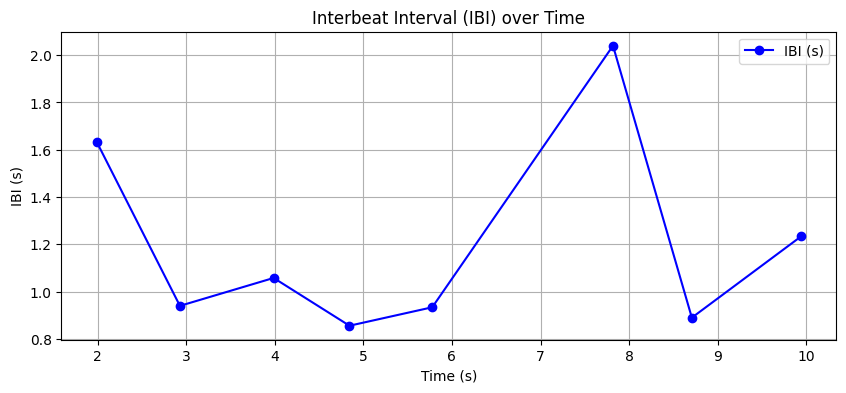

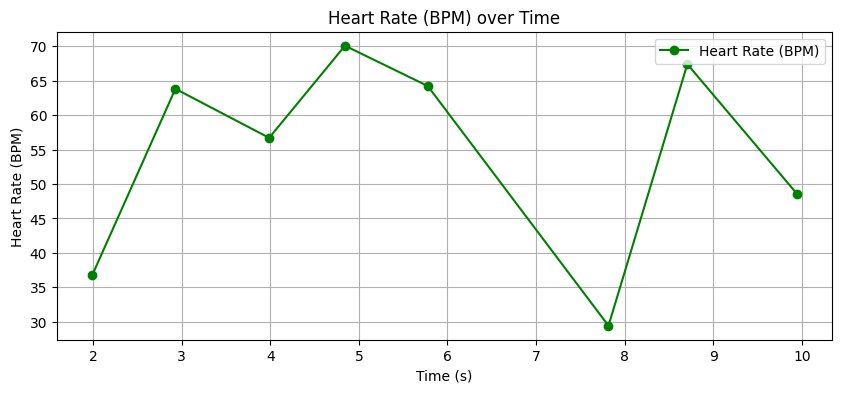

In [94]:
import numpy as np

# Assuming `peaks` and `time_10s` are already defined from the previous peak detection step

# Calculate Interbeat Interval (IBI) in seconds
IBIs = np.diff(time_10s[peaks])  # Difference in time between consecutive peaks (systolic peaks)

# Calculate Heart Rate (HR) in beats per minute (BPM)
HR = 60 / IBIs  # Heart rate in BPM

# Display the IBI and HR values
print("Interbeat Intervals (IBI) in seconds:", IBIs)
print("Heart Rate (HR) in BPM:", HR)

# Plot IBI over time
plt.figure(figsize=(10, 4))
plt.plot(time_10s[peaks][1:], IBIs, marker='o', color='blue', label='IBI (s)')
plt.xlabel('Time (s)')
plt.ylabel('IBI (s)')
plt.title('Interbeat Interval (IBI) over Time')
plt.legend()
plt.grid()
plt.show()

# Plot HR over time
plt.figure(figsize=(10, 4))
plt.plot(time_10s[peaks][1:], HR, marker='o', color='green', label='Heart Rate (BPM)')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (BPM)')
plt.title('Heart Rate (BPM) over Time')
plt.legend()
plt.grid()
plt.show()



In [97]:
import numpy as np

# Assuming `peaks` and `time_10s` are already defined from the previous peak detection step

# Calculate Interbeat Interval (IBI) in seconds
IBIs = np.diff(time_10s[peaks])  # Difference in time between consecutive systolic peaks (in seconds)

# Calculate the average IBI (mean interbeat interval)
average_IBI = np.mean(IBIs)

# Calculate the average Heart Rate (HR) in beats per minute (BPM)
average_HR = 60 / average_IBI  # Heart rate in BPM

# Display the average IBI and HR values
print(f"Average Interbeat Interval (IBI): {average_IBI:.2f} seconds")
print(f"Average Heart Rate (HR): {average_HR:.2f} BPM")



Average Interbeat Interval (IBI): 1.20 seconds
Average Heart Rate (HR): 50.07 BPM


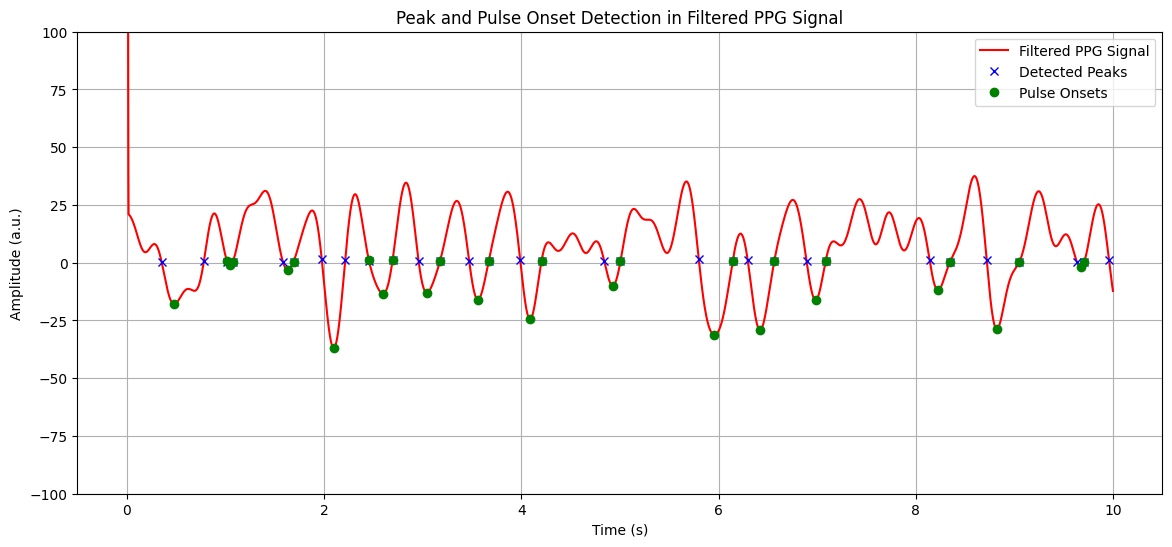

In [79]:
#USE OF Pulse peak determination using Gaussian derivative filter (GDF), positive zerocrossing detection, and peak correction.
#Pulse onset determination by finding the local minimum between two successive detected peaks.


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.stats import norm

# Step 1: Define Gaussian Derivative Filter
def gaussian_derivative_filter(size, sigma):
    t = np.linspace(-size // 2, size // 2, size)
    g = norm.pdf(t, 0, sigma)
    g_derivative = -t / (sigma**2) * g
    return g_derivative

# Step 2: Apply Gaussian Derivative Filter to PPG Signal
def apply_gdf(ppg_signal, size=21, sigma=3):
    gdf = gaussian_derivative_filter(size, sigma)
    filtered_signal = convolve(ppg_signal, gdf, mode='same')
    return filtered_signal

# Step 3: Zero-Crossing Detection for Peaks
def detect_peaks(signal):
    zero_crossings = np.where(np.diff(np.sign(signal)))[0]
    return zero_crossings + 1

# Step 4: Peak Correction
def correct_peaks(signal, peaks):
    corrected_peaks = []
    for peak in peaks:
        window = signal[max(0, peak-2):min(len(signal), peak+2)]
        corrected_peak = np.argmax(window) + max(0, peak-2)
        corrected_peaks.append(corrected_peak)
    return np.array(corrected_peaks)

# Step 5: Find Local Minima for Pulse Onset Determination
def find_pulse_onsets(peaks, signal):
    pulse_onsets = []
    for i in range(1, len(peaks)):
        start = peaks[i-1]
        end = peaks[i]
        local_min = np.argmin(signal[start:end]) + start
        pulse_onsets.append(local_min)
    return np.array(pulse_onsets)

# Assuming 'ppg_signal' and 'fs' (sampling frequency) are already defined
# Apply Gaussian Derivative Filter
filtered_signal = apply_gdf(filtered_ppg_signal)

# Detect peaks using zero-crossing
peaks = detect_peaks(filtered_signal)

# Correct the detected peaks
corrected_peaks = correct_peaks(filtered_signal, peaks)

# Find pulse onsets
pulse_onsets = find_pulse_onsets(corrected_peaks, filtered_signal)

# Limit the filtered signal to the first 10 seconds for plotting
filtered_signal_10s = filtered_signal[:max_index]
corrected_peaks_10s = corrected_peaks[corrected_peaks < max_index]  # Limit corrected peaks
pulse_onsets_10s = pulse_onsets[pulse_onsets < max_index]  # Limit pulse onsets
# Plotting Results with Reduced Y-axis Scale
plt.figure(figsize=(14, 6))
plt.plot(time_10s, filtered_signal_10s, label='Filtered PPG Signal', color='red')
plt.plot(time_10s[corrected_peaks_10s], filtered_signal_10s[corrected_peaks_10s], 'x', label='Detected Peaks', color='blue')
plt.plot(time_10s[pulse_onsets_10s], filtered_signal_10s[pulse_onsets_10s], 'o', label='Pulse Onsets', color='green')

# Set the limits for y-axis to 100
plt.ylim(-100, 100)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Peak and Pulse Onset Detection in Filtered PPG Signal')
plt.legend()
plt.grid()
plt.show()




In [80]:
# Filter corrected_peaks to be within the valid range
valid_peaks = corrected_peaks[corrected_peaks < len(time_10s)]

# Calculate IBI in seconds
ibis = np.diff(time_10s[valid_peaks])  # Time difference between successive peaks
print("Inter-Beat Intervals (IBI) in seconds:", ibis)

# Calculate Heart Rate in beats per minute (BPM)
heart_rates = 60 / ibis  # Convert IBI to heart rate
print("Heart Rate (BPM):", heart_rates)

# Optional: Average Heart Rate and IBI
average_ibi = np.mean(ibis)
average_hr = np.mean(heart_rates)

print("Average IBI (seconds):", average_ibi)
print("Average Heart Rate (BPM):", average_hr)


Inter-Beat Intervals (IBI) in seconds: [0.43  0.238 0.052 0.51  0.108 0.286 0.238 0.242 0.238 0.264 0.216 0.296
 0.198 0.32  0.216 0.636 0.164 0.794 0.344 0.152 0.27  0.326 0.194 1.054
 0.206 0.372 0.33  0.584 0.076 0.25 ]
Heart Rate (BPM): [ 139.53488372  252.10084034 1153.84615385  117.64705882  555.55555556
  209.79020979  252.10084034  247.9338843   252.10084034  227.27272727
  277.77777778  202.7027027   303.03030303  187.5         277.77777778
   94.33962264  365.85365854   75.56675063  174.41860465  394.73684211
  222.22222222  184.04907975  309.27835052   56.9259962   291.26213592
  161.29032258  181.81818182  102.73972603  789.47368421  240.        ]
Average IBI (seconds): 0.3201333333333334
Average Heart Rate (BPM): 276.68822444747104
